In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as scl
from IPython.display import clear_output

plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [3]:
def extract_stat_country(COVID_data,country_name,stat_name,N_stat,type_country):
    N_country   = len(country_name)
    stat_COVID_countries = np.empty([N_country,N_stat])

    for ind_country in range(N_country):
        tmp_COVID_country  = COVID_data.loc[COVID_data[type_country]
                                            ==country_name[ind_country]]
        
        date_country       = tmp_COVID_country['date']
        ind_date = pd.to_datetime(date_country,format='%Y-%m-%d')>=start_time

        tmp_stat_COVID_country = tmp_COVID_country[stat_name]
        stat_COVID_countries[ind_country,:] = tmp_stat_COVID_country[ind_date]
        
    return stat_COVID_countries

## 1. Read the COVID19 data

In [21]:
color_name     = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
                  'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','k','r','b']

In [4]:
dir_name  = "./DATA/"
# file_name = "COVID19data.csv"
file_name = "covid-data.csv"
path_name = dir_name+file_name

COVID_data = pd.read_csv(path_name,encoding='euc-kr')

In [5]:
COVID_data

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
79272      ZWE    Africa     Zimbabwe  2021-03-30      36839.0        0.0   
79273      ZWE    Africa     Zimbabwe  2021-03-31      36882.0       43.0   
79274      ZWE    Africa     Zimbabwe  2021-04-01      36896.0       14.0   
79275      ZWE    Africa     Zimbabwe  2021-04-02      36903.0        7.0   
79276      ZWE    Africa     Zimbabwe  2021-04-03      36911.0        8.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         NaN                  NaN  ...   
1                     NaN           NaN         NaN                  NaN  ...   
2                     NaN           NaN         NaN                  NaN  ...   
3                     NaN           NaN         NaN                  NaN  ...   
4                     NaN           NaN         NaN                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
79272              17.429        1520.0         0.0                0.571  ...   
79273              19.000        1523.0         3.0                1.000  ...   
79274              16.857        1523.0         0.0                0.714  ...   
79275              14.000        1524.0         1.0                0.857  ...   
79276              13.286        1524.0         0.0                0.714  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
79272        1899.775             21.4                307.846   
79273        1899.775             21.4                307.846   
79274        1899.775             21.4                307.846   
79275        1899.775             21.4                307.846   
79276        1899.775             21.4                307.846   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
79272                 1.82             1.6          30.7   
79273                 1.82             1.6          30.7   
79274                 1.82             1.6          30.7   
79275                 1.82             1.6          30.7   
79276                 1.82             1.6          30.7   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
79272                  36.791                         1.7   

## 2. Select Countries [Training & Validation]

In [8]:
toal_country        = ["United Kingdom","Germany","France","Spain","Italy",
                       "Netherlands","Belgium","Greece","Romania","Austria"]

train_country       = ["United Kingdom","Germany","Italy","Netherlands","Belgium"]
validation_country  = ["Romania"]

# statistic_type      = ["newConfirmed","newDeath"]
statistic_type      = ["new_cases","new_deaths"]

## 3. Extract Statistics to 1 Total Array

In [9]:
start_time = pd.to_datetime('2020-03-01',format='%Y-%m-%d')

if  (statistic_type[0] == "newConfirmed"):
    type_country       = "Country"
    tmp_COVID_country  = COVID_data.loc[COVID_data[type_country]==
                                        toal_country[0]]
    date_country       = tmp_COVID_country['Date']
    
elif (statistic_type[0] == "new_cases"):
    type_country       = "location"
    tmp_COVID_country  = COVID_data.loc[COVID_data[type_country]==
                                        toal_country[0]]
    date_country       = tmp_COVID_country['date']
    
ind_date = pd.to_datetime(date_country,format='%Y-%m-%d')>=start_time
COVID_country = tmp_COVID_country[ind_date][:]
stat_COVID_country = COVID_country[statistic_type[0]]


N_country   = len(train_country)  ; N_stat      = len(stat_COVID_country)

total_stat_1_COVID_countries  = extract_stat_country(COVID_data,toal_country,
                                                 statistic_type[0],N_stat,type_country)
total_stat_2_COVID_countries  = extract_stat_country(COVID_data,toal_country,
                                                 statistic_type[1],N_stat,type_country)

train_stat_1_COVID_countries  = extract_stat_country(COVID_data,train_country,
                                                 statistic_type[0],N_stat,type_country)
train_stat_2_COVID_countries  = extract_stat_country(COVID_data,train_country,
                                                 statistic_type[1],N_stat,type_country)

validation_stat_1_COVID_countries  = extract_stat_country(COVID_data,validation_country,
                                                 statistic_type[0],N_stat,type_country)
validation_stat_2_COVID_countries  = extract_stat_country(COVID_data,validation_country,
                                                 statistic_type[1],N_stat,type_country)

## 4. Correlation Tables of Statistics between Each Country

In [10]:
pd_train_stat_1_COVID      = pd.DataFrame(train_stat_1_COVID_countries.T,
                                          columns=train_country)
pd_validation_stat_1_COVID = pd.DataFrame(validation_stat_1_COVID_countries.T,
                                          columns=validation_country)
pd_total_stat_1_COVID      = pd.DataFrame(total_stat_1_COVID_countries.T,
                                          columns=toal_country)


pd_train_stat_2_COVID      = pd.DataFrame(train_stat_2_COVID_countries.T,
                                          columns=train_country)
pd_validation_stat_2_COVID = pd.DataFrame(validation_stat_2_COVID_countries.T,
                                          columns=validation_country)
pd_total_stat_2_COVID      = pd.DataFrame(total_stat_2_COVID_countries.T,
                                          columns=toal_country)

In [11]:
corr_table_stat_1 = pd_total_stat_1_COVID.corr()
corr_table_stat_2 = pd_total_stat_2_COVID.corr()

fig, axes = plt.subplots(1,2,figsize=(21,9),constrained_layout=True)

sns.heatmap(corr_table_stat_1,annot=True,cmap="jet",linewidths=0.5,
            vmin=0.,vmax=1.,fmt=".2f",ax=axes[0],
            xticklabels=pd_total_stat_1_COVID.axes[1],
            yticklabels=pd_total_stat_1_COVID.axes[1]
           )

sns.heatmap(corr_table_stat_2,annot=True,cmap="jet",linewidths=0.5,
            vmin=0.,vmax=1.,fmt=".2f",ax=axes[1],
            xticklabels=pd_total_stat_2_COVID.axes[1],
            yticklabels=pd_total_stat_2_COVID.axes[1]
           )

axes[0].set_title(statistic_type[0])
axes[1].set_title(statistic_type[1])

axes[0].set_xticklabels(pd_total_stat_1_COVID.axes[1],rotation=90)
axes[1].set_xticklabels(pd_total_stat_2_COVID.axes[1],rotation=90)

dir_name = "./RESULT/"
fig.savefig(dir_name+"Corr_table.pdf",format='pdf')

## 5. Time Series of new Confirmed cases for training countries

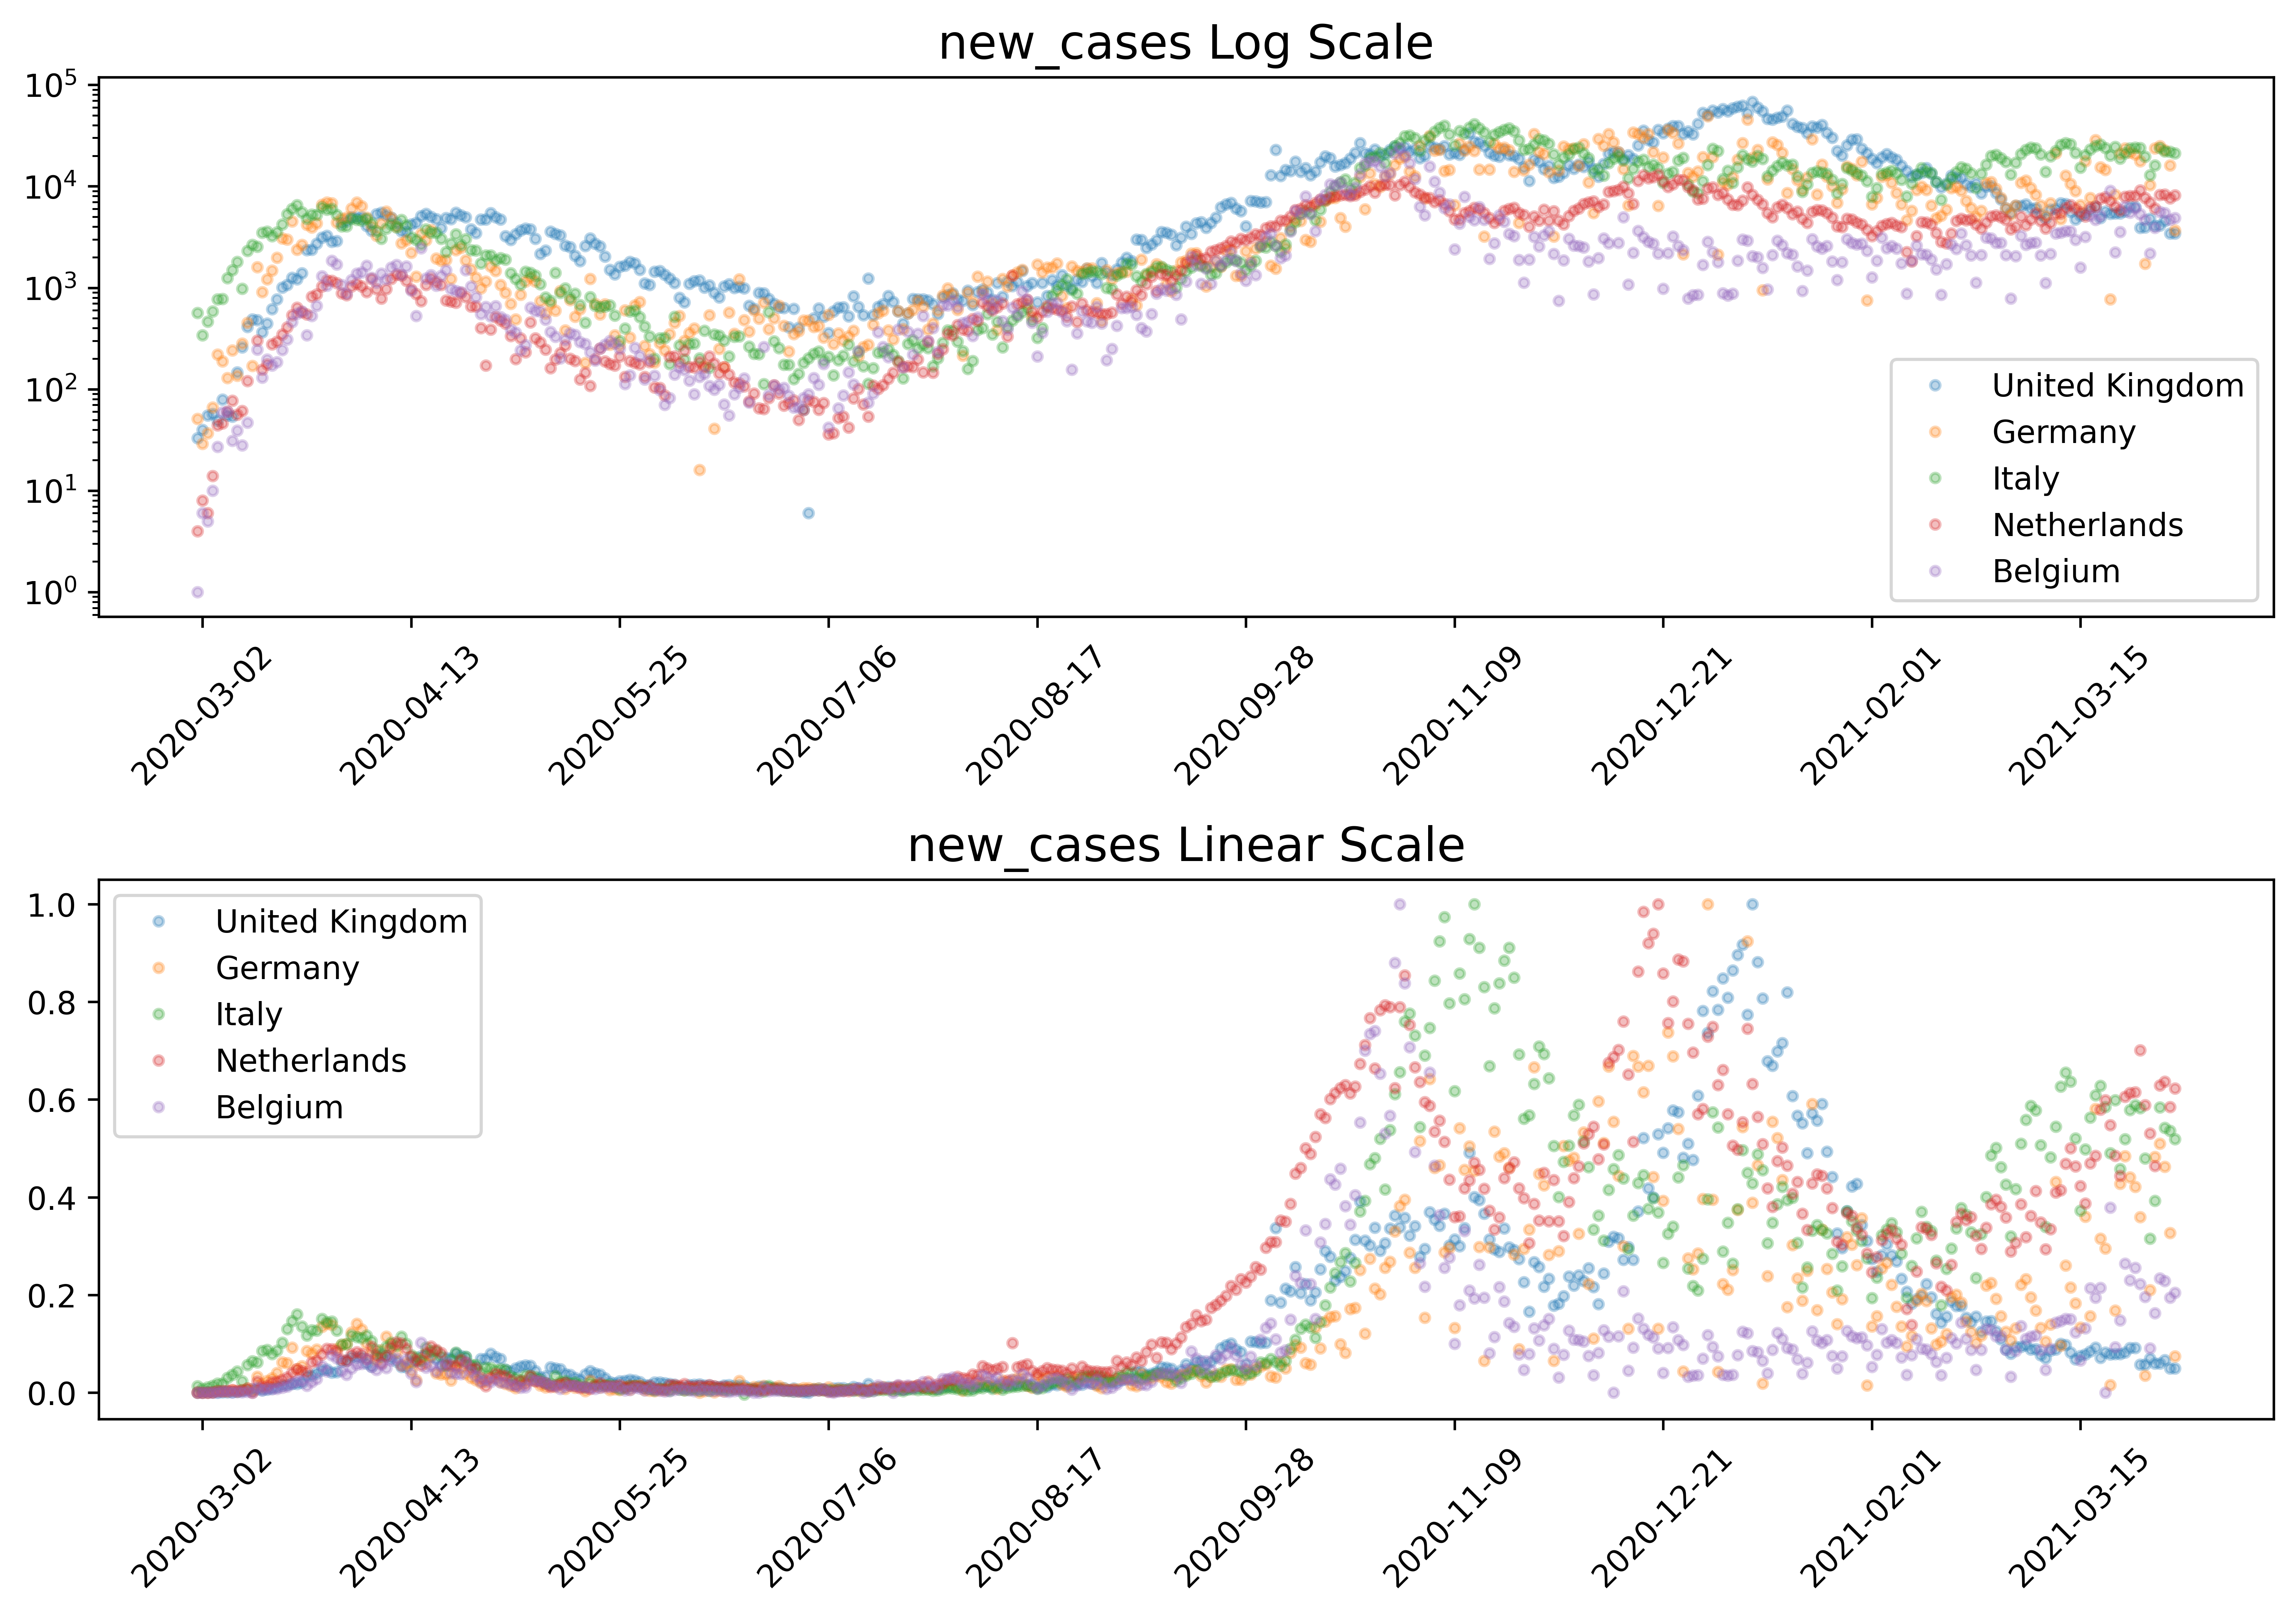

In [12]:
N_point = 10 

N_date = len(date_country)
date = date_country[ind_date].values
date_name = date[1:N_date:int(N_date/N_point)]

fig, axes = plt.subplots(2,1,figsize=(10,7),constrained_layout=True)

for ind_country in range(N_country):
    tmp_stat_1 = train_stat_1_COVID_countries[ind_country,:]
    tmp_stat_2 = train_stat_2_COVID_countries[ind_country,:]

    axes[0].plot(date,tmp_stat_1,
                 '.',linewidth=1,color=color_name[ind_country],
                 label=train_country[ind_country],alpha=0.3)
    
    axes[1].plot(date,tmp_stat_1/tmp_stat_1.max(),
                 '.',linewidth=1,color=color_name[ind_country],
                 label=train_country[ind_country],alpha=0.3)

axes[0].set_title(statistic_type[0]+" Log Scale",fontsize=15)
axes[1].set_title(statistic_type[0]+" Linear Scale",fontsize=15)
axes[0].set_yscale("log")

for ind_axes in range(2):
    axes[ind_axes].set_xticks(date_name)
    axes[ind_axes].set_xticklabels(date_name,rotation=45)
    axes[ind_axes].legend()

## 6. Made Sequential Network Model 

In [13]:
model = tf.keras.Sequential(
            [ 
              tf.keras.layers.Dense(24,activation='relu',input_shape=[5]),
              tf.keras.layers.Dense(24,activation='relu'),
              tf.keras.layers.Dense(24,activation='relu'),
              tf.keras.layers.Dense(1),
            ]
        )

In [14]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [15]:
ratio_data = 0.8
N_ratio    = int(N_stat*ratio_data)

## Data for train & validation
train_input_set_COVID  = train_stat_1_COVID_countries.T[0:N_ratio,:]
train_output_set_COVID = validation_stat_1_COVID_countries.T[0:N_ratio]

validation_input_set_COVID  = train_stat_1_COVID_countries.T[N_ratio:,:]
validation_output_set_COVID = validation_stat_1_COVID_countries.T[N_ratio:]

## Data Scaling for train & validation
type_scaler      = scl.MinMaxScaler()
type_scaler.fit(train_input_set_COVID)

train_input      = type_scaler.transform(train_input_set_COVID)
validation_input = type_scaler.transform(validation_input_set_COVID)

train_output =  train_output_set_COVID
validation_output = validation_output_set_COVID

## 7. Train the Model using Train & Validation Data

In [16]:
max_epochs = 1000
d_epochs   = 100 
N_iter     = int(max_epochs/d_epochs)

TS_corr     =  np.empty([N_iter])
TS_loss     =  np.empty([max_epochs])
TS_val_loss =  np.empty([max_epochs])

for it in range(N_iter):
    history = model.fit(
                        train_input,
                        train_output,
                        batch_size=100,
                        epochs=d_epochs,
                        validation_data=(validation_input,
                                         validation_output),
                        verbose=0
                      )

    validation_output_model = np.array(model(validation_input))
    corr_model  = np.corrcoef(validation_output.T,validation_output_model.T)[0][1]
    
    TS_corr[it] = corr_model
    TS_loss[it*d_epochs:(it+1)*d_epochs]     = history.history['loss']
    TS_val_loss[it*d_epochs:(it+1)*d_epochs] = history.history['val_loss']
    print("Corr : {:4.2f} ({}/{})".format(corr_model,d_epochs*it,max_epochs))


Corr : 0.63 (0/1000)
Corr : 0.71 (100/1000)
Corr : 0.79 (200/1000)
Corr : 0.85 (300/1000)
Corr : 0.89 (400/1000)
Corr : 0.91 (500/1000)
Corr : 0.92 (600/1000)
Corr : 0.93 (700/1000)
Corr : 0.92 (800/1000)
Corr : 0.92 (900/1000)


## 8. XY Plot for Loss Function

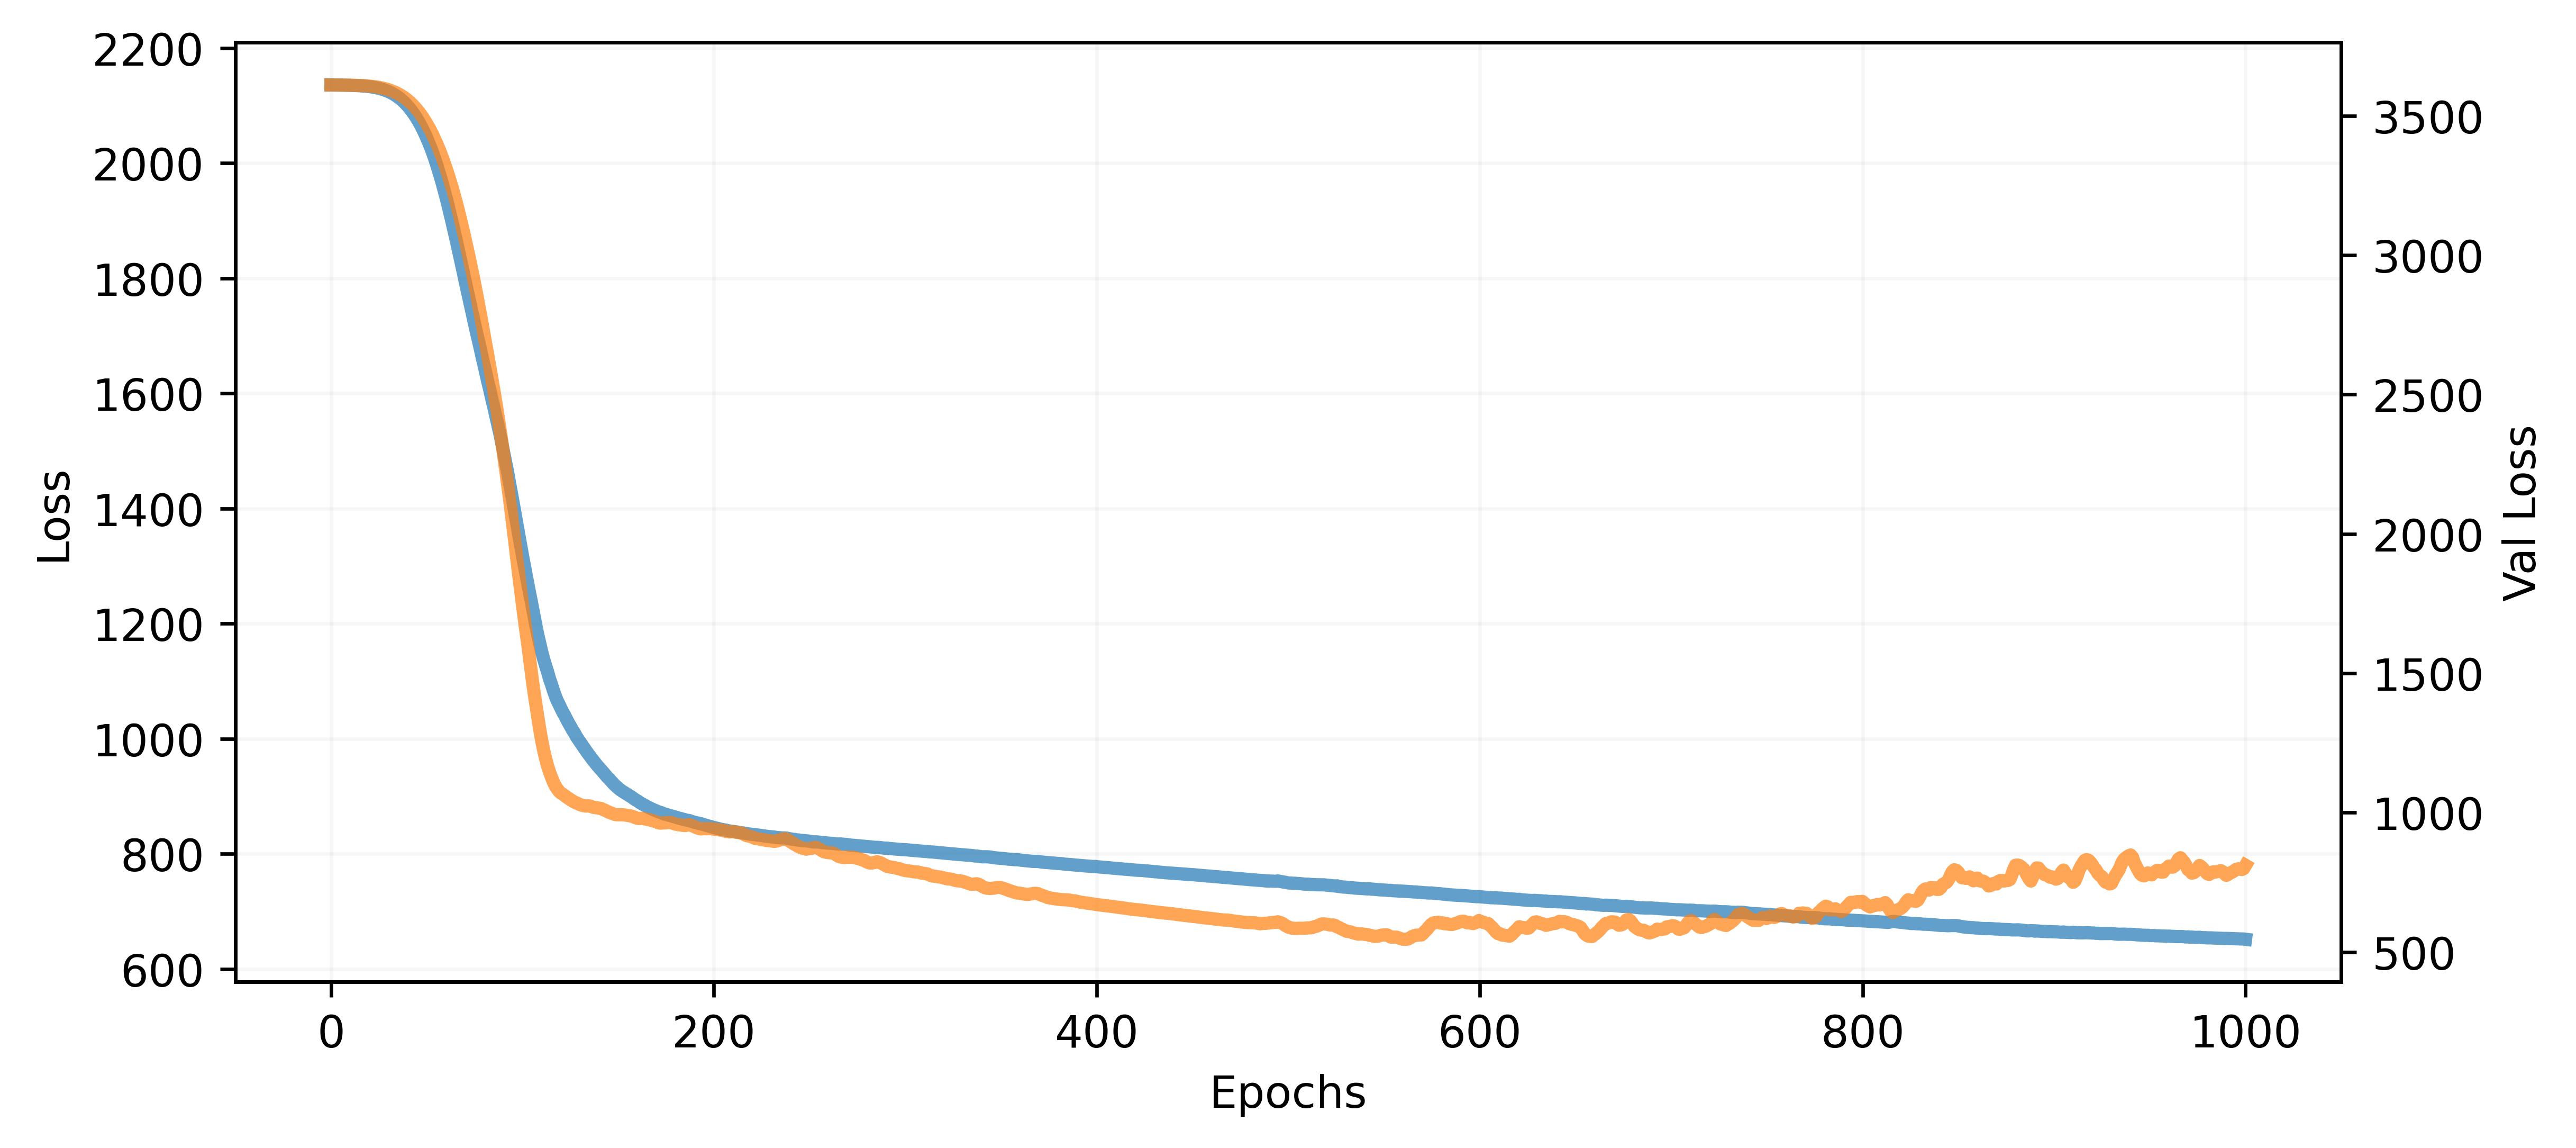

In [17]:
fig,axes = plt.subplots(1,1,figsize=(8,3.5),constrained_layout=True)
ax2 = axes.twinx()

axes.plot(np.linspace(0,max_epochs,max_epochs),TS_loss,'-',color='tab:blue',
          linewidth=3,markersize=10,alpha=0.7)

ax2.plot(np.linspace(0,max_epochs,max_epochs),TS_val_loss,'-',color='tab:orange',
         linewidth=3,markersize=10,alpha=0.7)


axes.set_xlabel("Epochs")
axes.set_ylabel("Loss")
ax2.set_ylabel("Val Loss")

axes.grid(alpha=0.1)

## 9. XY Plot for Correlation Function 

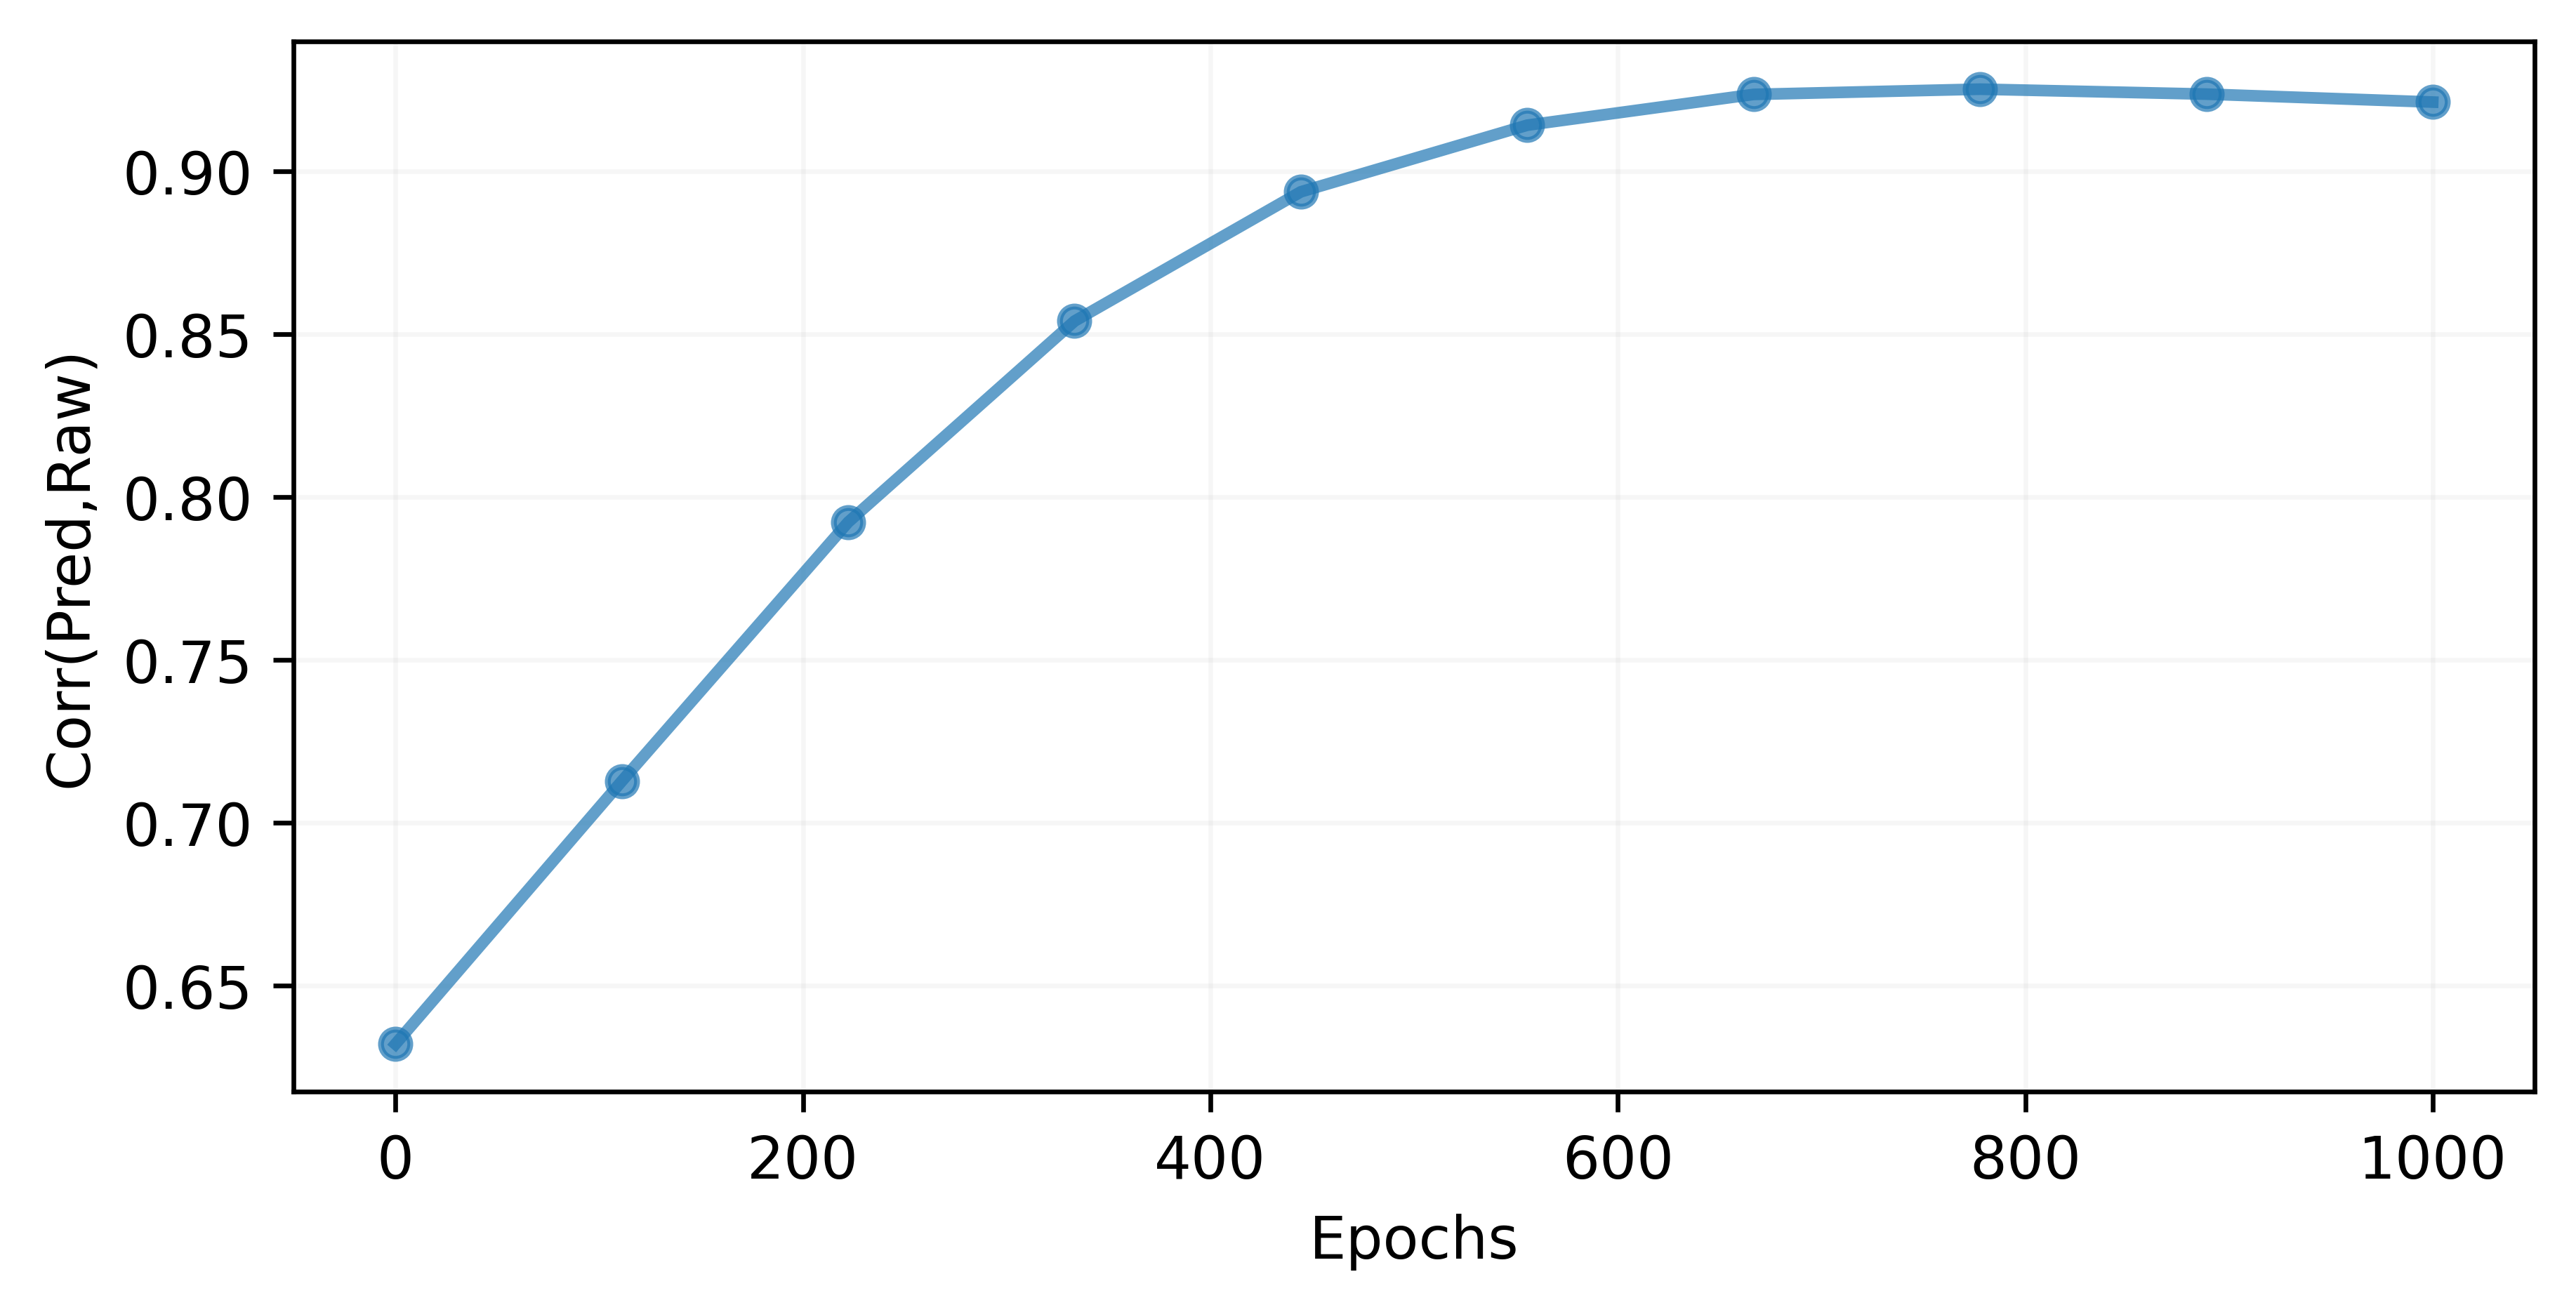

In [18]:
fig,axes = plt.subplots(1,1,figsize=(6,3),constrained_layout=True)

axes.plot(np.linspace(0,max_epochs,N_iter),TS_corr,
         '.-',linewidth=2,markersize=10,alpha=0.7)

axes.set_xlabel("Epochs")
axes.set_ylabel("Corr(Pred,Raw)")
axes.grid(alpha=0.1)

## 9. Predict the time series using statistics of 5 countries

In [19]:
validation_output_model = np.array(model(validation_input))

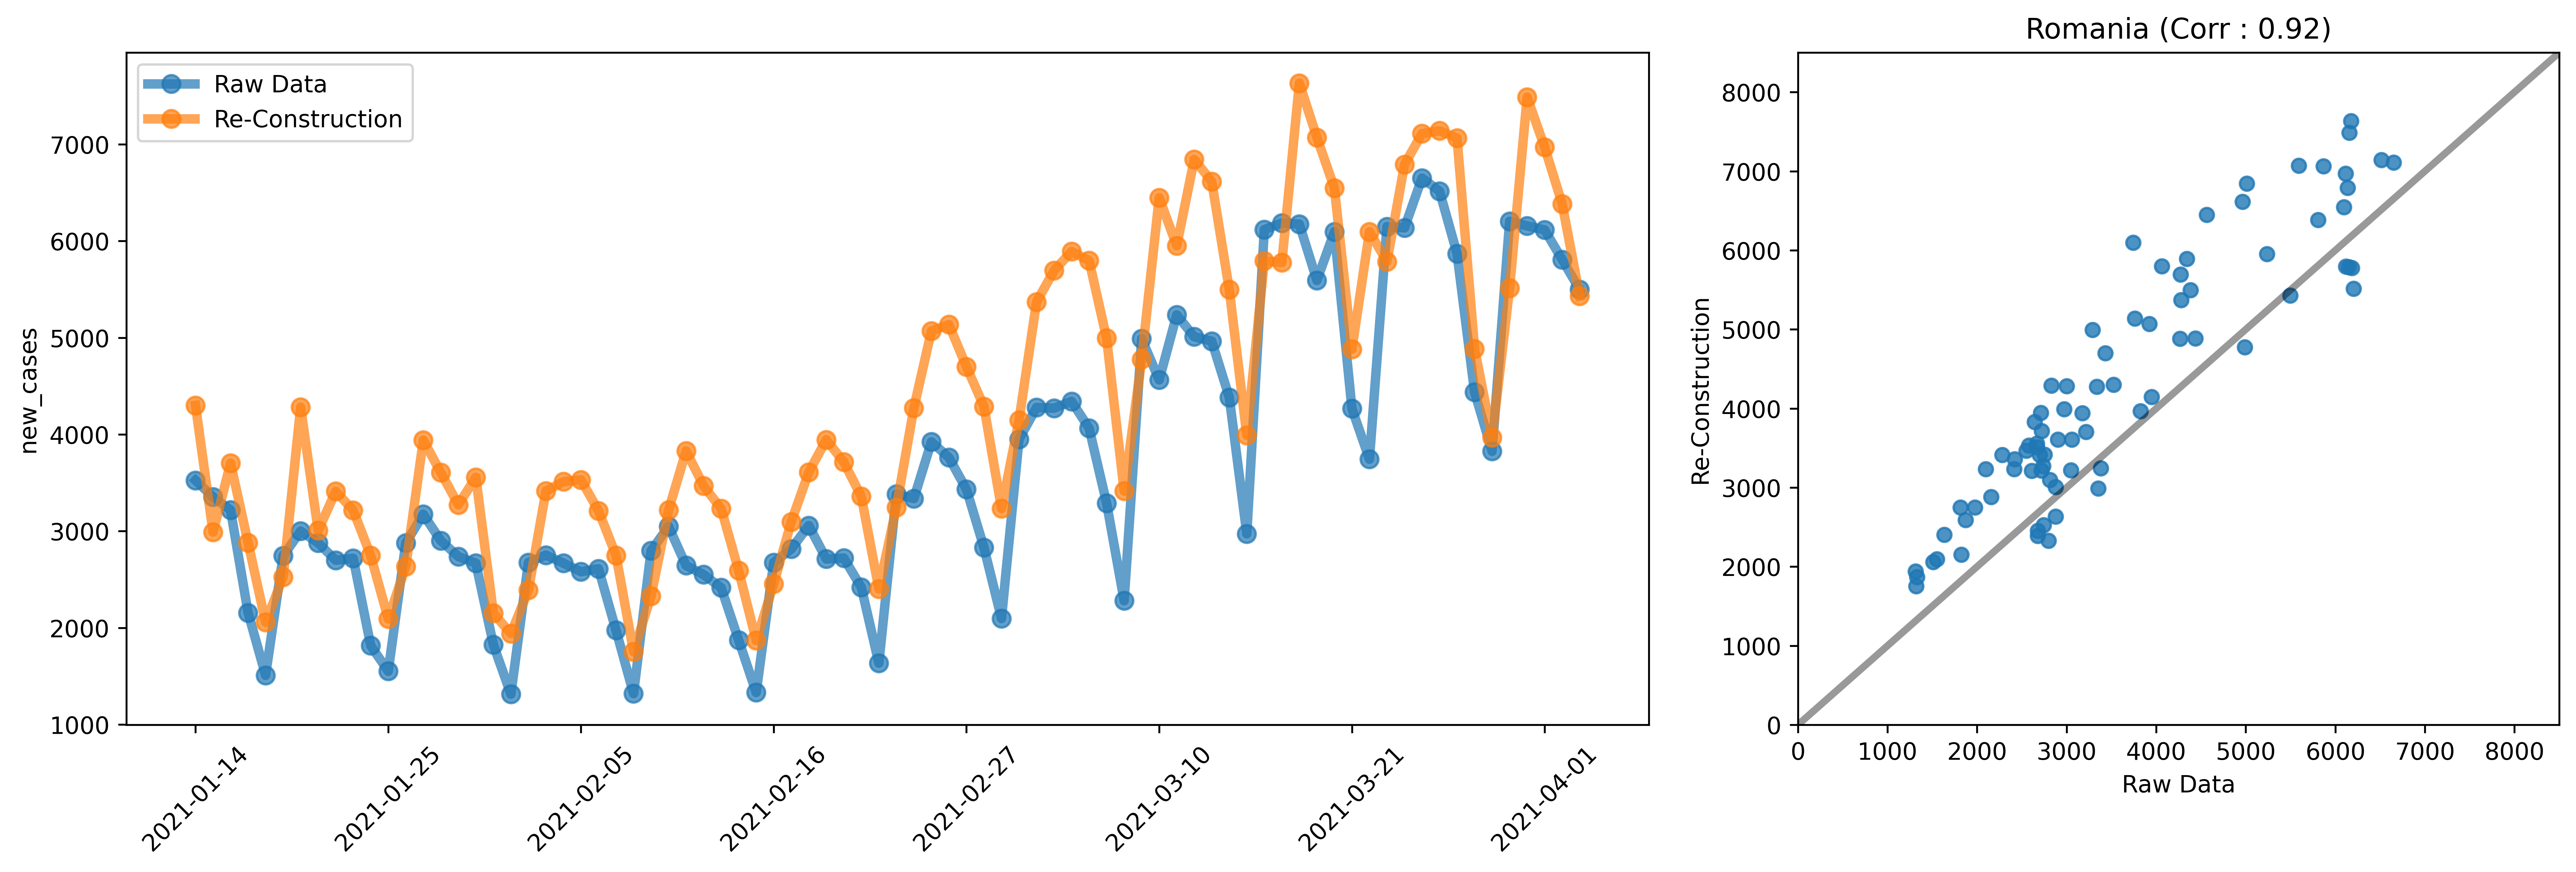

In [20]:
N_point = 10 

N_date = len(date_country)
date = date_country[ind_date].values
date_name = date[N_ratio:N_date:int((N_date-N_ratio)/N_point)]


fig, axes = plt.subplots(1,2,figsize=(15,5),
                         gridspec_kw={'width_ratios': [2, 1]},constrained_layout=True)

tmp_output_raw   = validation_output
tmp_output_model = validation_output_model

axes[0].plot(date_country[ind_date][N_ratio:],tmp_output_raw,'.-',
                 linewidth=4,markersize=15,color='tab:blue',
                 label='Raw Data',alpha=0.7)    

axes[0].plot(date_country[ind_date][N_ratio:],tmp_output_model,'.-',
                 linewidth=4,markersize=15,color='tab:orange',
                 label='Re-Construction',alpha=0.7)

axes[1].scatter(tmp_output_raw,tmp_output_model,color='tab:blue',s=35,alpha=0.8)
corr_model = np.corrcoef(tmp_output_raw.T,tmp_output_model.T)[0][1]

val_min =0 ; val_max = 8500

axes[0].set_xticks(date_name)
axes[0].set_xticklabels(date_name,rotation=45)
axes[0].set_ylabel(statistic_type[0])    
    
axes[1].set_xlim([val_min,val_max])
axes[1].set_ylim([val_min,val_max])
axes[1].set_ylabel("Re-Construction")
axes[1].set_xlabel("Raw Data")
axes[1].set_title(validation_country[0]+" (Corr : {:4.2f})".format(corr_model))

axes[1].plot(np.linspace(val_min,val_max),
             np.linspace(val_min,val_max),
             color='k',linewidth=3,alpha=0.4)

axes[0].legend()
    
dir_name = "./RESULT/"
fig.savefig(dir_name+validation_country[0]+"_Reconstruction.pdf",format='pdf')